## Import Modules
Let's start with importing the important modules for the tasks to be performed.


In [1]:
import numpy as np                           #to do some numerical operations with the dataset
import pandas as pd                          #to read the dataset
import os                                    #to add some files if it's necessary
import matplotlib.pyplot as plt              #to visualize the data
import seaborn as sns                        #for imformative statistical plots

## Load the Dataset
The data set contains e classes of 50 instances each, where each class refers to a type of Iris plant. one class is linearly separable from other 2; the latter are NOT linearly separable from each other. This dataset is popularly used in Machine Learning to understand classification problems.

In [2]:
from sklearn.datasets import load_iris # Load the Iris dataset using scikit-learn library
iris = load_iris()


The iris variable contains a bunch object with data, target, and other attributes.
Attribute Information:

1. Sepal Length in cm
2. Sepal width incm
3. Petal length in cm
4. Petal width in cm
5. Species of Iris Plant: Iris setosa-Iris Versicolur-Iris Virginica which are loaded as numbers for convenience of use in the 'target' with integers


In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)   #Framing a dataframe for the loaded dataset, with columns as feature names.
df["target"] = iris.target

print(df.head())  # Display the first few rows of the dataset
iris=load_iris()
iris.target_names


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Let's now check her the basic statistics and about the the data we have

In [4]:
df.describe()  #To display basic stats about the Data with describe function



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
df.info() #let's see the basic the information about the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


## Preprocess the data
It's important to preprocess the data to ensure it's in suitable format and better quality of analysis.

In [6]:
df.isnull().sum()   #check for null values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

For my Convenience to categorize I am converting numerical target values to strings with sepcies names and forming a separate dataframe.

In [7]:
#converting numerical target value to string values
df_features = pd.DataFrame(data=iris.data, columns=iris.feature_names) # Create a DataFrame for the features
target_strings = [iris.target_names[i] for i in iris.target] # Convert target values to strings
df_target = pd.DataFrame(data={'Species': target_strings}) # Create a DataFrame for the target values
iris_df = pd.concat([df_features, df_target], axis=1) # Create a DataFrame for the target values

# Display the resulting DataFrame
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       Species  
0       se

In [8]:
iris_df.head() #Let's see the first 5 rows in the new dataframe


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
iris_df.groupby('Species').size()  #also let's check how many number of data each section contains

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

 ## Exploratory Data Analysis
 Let's first try to visually and statistically summerize our dataset with seaborn to find out the distribution structure and trends for further modeling.

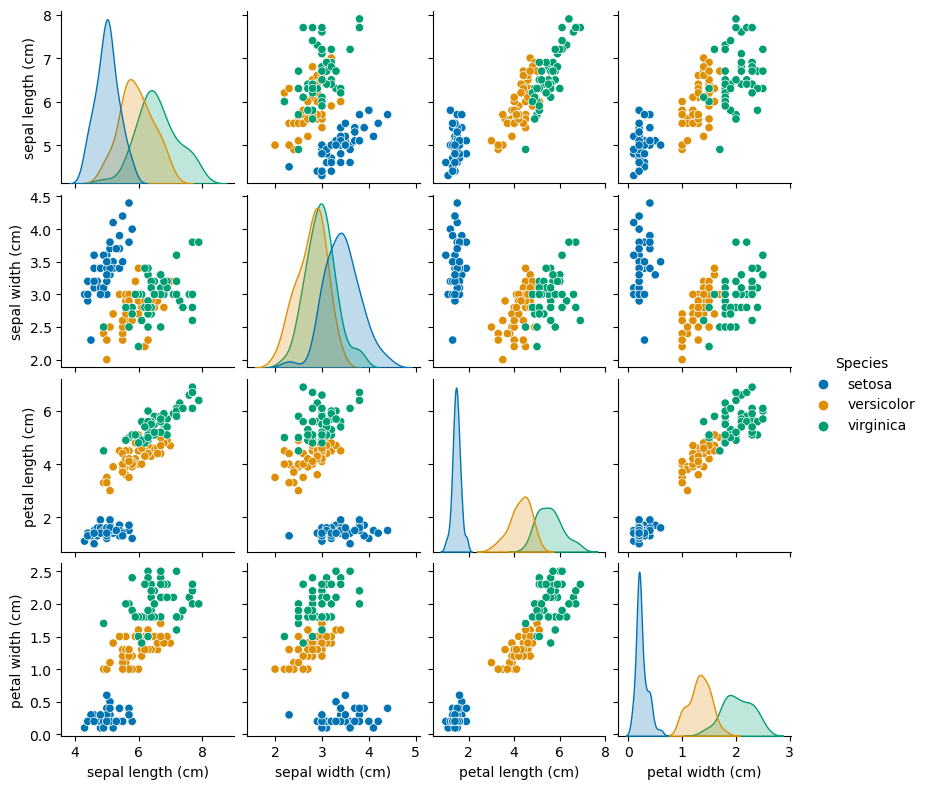

In [10]:
#let's plot aevery attribute of the data set against each other.
sns.pairplot(iris_df, hue = 'Species',  height = 2, palette = 'colorblind')

The scatter plot matrix helps to examine the relationshio between the pairs. as we can see, though 'setosa' has prominent different features but in few of the both the features are coliding where the accuracy of our trained model to classify the flower has to be tested well.


## Split the dataset into Train and Test sets

Take out 20% of the total data as the test data set and start anaylsis the pattern on our rest 80% of data as training dataset.

In [11]:
from sklearn.model_selection import train_test_split   # train_test_split function is imported from sklearn.model_selection.


# let's take out 20% of total samples for testing the models.
train, test = train_test_split(iris_df, test_size = 0.20, stratify = iris_df['Species'], random_state = 42)
X_test, Y_test = test.drop(columns = ['Species']), test['Species']
X_train, Y_train = test.drop(columns = ['Species']), test['Species']

In [12]:
#checking the no of datasets in train and test frames.
print("Shape of trained dataset: ", train.shape)
print("Shape of test dataset: ", test.shape)

Shape of trained dataset:  (120, 5)
Shape of test dataset:  (30, 5)


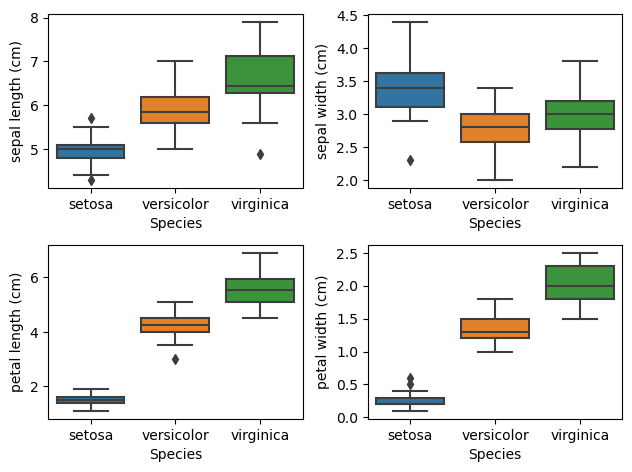

In [13]:
# boxplots using seaborn to see the where most of the attributes lies in each species
fig, axs = plt.subplots(2, 2)
fn = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
cn = ['setosa', 'versicolor', 'virginica']
sns.boxplot(x = 'Species', y = 'sepal length (cm)', data = train, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'Species', y = 'sepal width (cm)', data = train, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'Species', y = 'petal length (cm)', data = train, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'Species', y = 'petal width (cm)', data = train,  order = cn, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0);

Box plots are used to visualize the distribution of one or more features for each species of iris flower. For example, if we see the box plot for petal length across different species, we can clearly see maximum no of data is concentranted in limited range, however in case of sepal length of some of the setosas have coaligned value with versicolor, similarly for others too.

## Correlation matrix

Let's  check the correlation coefficients between different attributes to check whether they have linear relation or not.



In [14]:
train.corr()

C:\Users\PC\AppData\Local\Temp\ipykernel_16596\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.112327,0.880401,0.820297
sepal width (cm),-0.112327,1.000000,-0.398502,-0.338741
petal length (cm),0.880401,-0.398502,1.000000,0.963693
petal width (cm),0.820297,-0.338741,0.963693,1.000000


As we can see some of the parameters (eg: petal length and sepal length) shows positive linear relation whether some parameters(eg: petal width and sepal width) shows negative linear regression.

In [15]:
corr = train.corr() #let's store the correlation matrix

C:\Users\PC\AppData\Local\Temp\ipykernel_16596\193094078.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr() #let's store the correlation matrix


<Axes: >

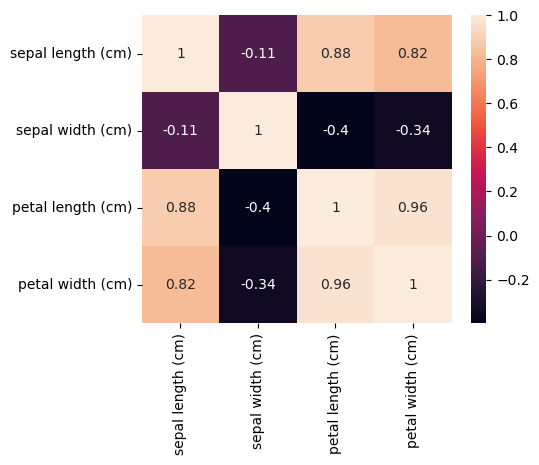

In [16]:
#let's try to visualize the correlation matrix graphically.
fig, ax = plt.subplots(figsize = (5,4))
sns.heatmap(corr, annot = True, ax = ax)

## Model Training
let's start with splitting up data from our train dataset to first check how accurate rest of the values fall in the classification. It is ensure whethere I am able to find out highest accuracy or not. Let's split the trained data in 70:30 again.


In [17]:
# #we need to split the data for training and validation dataset again again to fit the model,
from sklearn.model_selection import train_test_split
X = train.drop(columns = ['Species'])
Y = train['Species']
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size = 0.30, random_state = 42)

In [18]:
#checking the no of datasets in train and test validation data
print("Shape of trained dataset: ", x_train.shape)
print("Shape of validation dataset: ", x_val.shape)

Shape of trained dataset:  (84, 4)
Shape of validation dataset:  (36, 4)


## Import the models from scikit-learn library.

here, I am tring to fit the dataset into five classification models for learning purposes:



*   Logistic Regression
*   Random Forest
*   Support Vector Machine
*   K Nearest Neighbour
*   Decision Tree



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


Import the modules to chech the accuracy based on correct prediction/total no of predixtion.
also let's include the classicfication reports to check on how each correct predication gives us information about positive and negative true values.
Where,
* Precision: focuses on minimizing false positives.
* Recall: focuses on minimizing false negatives.
* F1-score: is a trade-off metric between precision and recall.
* Support: provides the count of instances in each class.

In [20]:
from sklearn.metrics import accuracy_score     #importing measure the accuracy score
from sklearn.metrics import classification_report  #classification report that includes precision, f1 report for each section

##Logistic Regression:
 Logistic Regression provides a way to model the probability of a linear relationship between input variables and a binary outcome.


In [21]:
# Create and train a Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

# Making the predictions on the validation set:
y_pred = model_lr.predict(x_val)

# Calculate accuracy using accuracy_score
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_val, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.93      0.93      0.93        14
   virginica       0.90      0.90      0.90        10

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36



##Random Forest Classifier

 Let's now apply a A Random Forest Classifier to classify the species of iris flower  resource or advantage to achieve a desired outcome or result the various features of the flowers, like sepal length and petal width, to predict which species each flower belongs to.


In [22]:
# Create and train a Random Forest Classifier model
model_rfc = RandomForestClassifier()
model_rfc.fit(x_train, y_train)

# Make predictions on the validation set
y_pred = model_rfc.predict(x_val)

# Calculate accuracy using accuracy_score
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_val, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.93      0.93      0.93        14
   virginica       0.90      0.90      0.90        10

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36



##Support Vector Machine:

 SVM is used usually if there is any overlap between different classes. So, SVM can be used to classify iris species based on features like petal length and sepal width. Since SVM is effective in handling high-dimensional data and can find complex decision boundaries, it can help accurately classify the iris species even when there might be overlap between the classes.

In [23]:
# Create and train a Support Vector Predict model
model_svm = SVC()
model_svm.fit(x_train, y_train)

# Make predictions on the validation set
y_pred = model_svm.predict(x_val)

# Calculate accuracy using accuracy_score
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_val, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.93      0.93      0.93        14
   virginica       0.90      0.90      0.90        10

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36



## K Nearest Neighbour

KNN can be applied to classify iris species based on their features. Since KNN's logic is based on similarity, it's effective when the data has patterns that can be recognized based on nearby instances.


In [24]:
# Create and train K Nearest Neighbour model
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)

# Make predictions on the validation set
y_pred = model_knn.predict(x_val)

# Calculate accuracy using accuracy_score
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_val, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.9722222222222222
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.93      0.96        14
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



## Decision Tree:
a Decision Tree can be used to classify iris species based on features like petal length and sepal width. The tree learns from the data to create a set of questions (if-else conditions) that help it distinguish between the species. The simplicity and interpretability of Decision Trees make them a good fit for the Iris dataset, which has distinct features that can be used to differentiate the species.


In [25]:
# Create and train a Decision Tree model
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

# Make predictions on the validation set
y_pred = model_dt.predict(x_val)

# Calculate accuracy using accuracy_score
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_val, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.9722222222222222
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.93      0.96        14
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



## Model Development for Test Dataset

Since, We cheked our model is well fitted in validation dataset or not, now we can go ahead to check whether it is fit for the test set that we took out. For that, let's initate train the model in our train data set(train) and predict it based on the test set(test)

In [26]:
#Let's take out the 30% validation set from test set:

X = train.drop(columns = ['Species'])
Y = train['Species']
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size = 0.30, random_state = 42)

In [27]:
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K Nearest Neighbor" : KNeighborsClassifier(),
    "Decision Tree" : DecisionTreeClassifier()
}

# Train the models with together
for model_name, model in models.items():
    model.fit(x_train, y_train)
    print(f"{model_name} trained successfully.")


Logistic Regression trained successfully.
Random Forest trained successfully.
Support Vector Machine trained successfully.
K Nearest Neighbor trained successfully.
Decision Tree trained successfully.


In [28]:
# Evaluate the models and calculate the final accuracy.
for model_name, model in models.items():
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"{model_name} Accuracy: {accuracy:.3f}") #keepingupto 3 decimal places
    print(classification_report(Y_test, Y_pred))


Logistic Regression Accuracy: 0.967
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Random Forest Accuracy: 0.933
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Support Vector Machine Accuracy: 0.933
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90 

Finally different classification models on iris dataset has been tested with high accuracy. Hence, these models are definitely reliable if we have to predict the species of an iris plant.